# 1 Modelo - Ana

#

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df_tratado = pd.read_csv("ocorrencias_aereas_tratadas.csv", encoding='latin1', sep=',')
display(df_tratado)

codigo_ocorrencia ocorrencia_classificacao  ocorrencia_latitude  \
0                  86954                 ACIDENTE           -29.085556   
1                  86953                 ACIDENTE            -9.596944   
2                  86952                INCIDENTE            -2.586944   
3                  86951          INCIDENTE GRAVE           -27.133889   
4                  86950                INCIDENTE           -23.435556   
...                  ...                      ...                  ...   
13145              28377                 ACIDENTE            -5.460139   
13146              28375                 ACIDENTE           -23.612222   
13147              28355                 ACIDENTE           -17.254167   
13148              28335                 ACIDENTE           -23.344444   
13149              28256                 ACIDENTE           -22.218056   

       ocorrencia_longitude ocorrencia_cidade ocorrencia_uf ocorrencia_pais  \
0                -29.085556    TUPANCIRET√É¬É√Ç¬É            RS          BRASIL   
1                 -9.596944             PILAR            AL          BRASIL   
2                 -2.586944    S√É¬É√Ç¬ÉO LU√É¬É√Ç¬çS            MA          BRASIL   
3                -27.133889        CHAPEC√É¬É√Ç¬ì            SC          BRASIL   
4                -23.435556         GUARULHOS            SP          BRASIL   
...                     ...               ...           ...             ...   
13145             -5.460139        IMPERATRIZ            MA          BRASIL   
13146            -23.612222         APUCARANA            PR          BRASIL   
13147            -17.254167       BOCAI√É¬É√Ç¬öVA            MG          BRASIL   
13148            -23.344444          LONDRINA            PR          BRASIL   
13149            -22.218056     MOGI GUA√É¬É√Ç¬áU            SP          BRASIL   

      ocorrencia_aerodromo ocorrencia_dia ocorrencia_hora  ...  \
0                     SIPJ     04/04/2025        17:20:00  ...   
1                     FAER     04/04/2025        09:05:00  ...   
2                     SBSL     03/04/2025        20:45:00  ...   
3                     SBCH     31/03/2025        22:30:00  ...   
4                     SBGR     05/04/2025        11:00:00  ...   
...                    ...            ...             ...  ...   
13145                 FAER     27/01/2007        11:18:00  ...   
13146                 FAER     26/01/2007        18:15:00  ...   
13147                 FAER     18/01/2007        09:10:00  ...   
13148                 FAER     19/01/2007        12:30:00  ...   
13149                 FAER     07/01/2007        11:30:00  ...   

                     aeronave_voo_destino aeronave_tipo_operacao  \
0                             SANTA MARIA                PRIVADA   
1                       FORA DE AERODROMO            AGR√É¬É√Ç¬çCOLA   
2                  MARECHAL CUNHA MACHADO           EXPERIMENTAL   
3                   SERAFIN ENOSS BERTASO                REGULAR   
4      GOVERNADOR ANDR√É¬É√Ç¬â FRANCO MONTORO                REGULAR   
...                                   ...                    ...   
13145   COMANDANTE CARLOS IN√É¬É√Ç¬ÅCIO AGNES                PRIVADA   
13146                           CONGONHAS       T√É¬É√Ç¬ÅXI A√É¬É√Ç¬âREO   
13147                    M√É¬É√Ç¬ÅRIO RIBEIRO       T√É¬É√Ç¬ÅXI A√É¬É√Ç¬âREO   
13148            GOVERNADOR JOS√É¬É√Ç¬â RICHA                PRIVADA   
13149                   FORA DE AERODROMO          ESPECIALIZADA   

      ocorrencia_ano idade outlier_ocorrencia_latitude  \
0               2025  35.0                      normal   
1               2025  15.0                      normal   
2               2025  11.0                      normal   
3               2025  14.0                      normal   
4               2025   4.0                      normal   
...              ...   ...                         ...   
13145           2007  37.0                      normal   
13146           2007   1.0         

In [ ]:
# Defina a coluna alvo (substitua 'target' pelo nome correto)
target_col = 'ocorrencia_classificacao' 

# Separe features e alvo
X = df_tratado.drop(columns=[target_col])
y = df_tratado[target_col]

# Se necess√°rio, transforme vari√°veis categ√≥ricas em dummies
X = pd.get_dummies(X)

# Divida em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 1. Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest:
                 precision    recall  f1-score   support

       ACIDENTE       0.71      0.80      0.75       568
      INCIDENTE       0.89      0.96      0.92      1826
INCIDENTE GRAVE       0.28      0.03      0.05       236

       accuracy                           0.84      2630
      macro avg       0.63      0.60      0.58      2630
   weighted avg       0.80      0.84      0.81      2630

[[ 457  104    7]
 [  71 1744   11]
 [ 115  114    7]]


In [ ]:
# 2. Regress√£o Log√≠stica
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

KeyboardInterrupt: 

In [ ]:
# Calcula o peso da classe negativa em rela√ß√£o √† positiva (ou vice-versa)
from collections import Counter

counts = Counter(y_train)
scale = counts[0] / counts[1] if counts[0] > counts[1] else counts[1] / counts[0]

model_xgb = XGBClassifier(scale_pos_weight=scale, use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

ZeroDivisionError: division by zero

In [ ]:
from lightgbm import LGBMClassifier

model_lgb = LGBMClassifier(class_weight='balanced', random_state=42)
model_lgb.fit(X_train, y_train)
y_pred_lgb = model_lgb.predict(X_test)

print("LightGBM:\n", classification_report(y_test, y_pred_lgb))

LightGBMError: Do not support special JSON characters in feature name.

# 2. Modelo de Predi√ß√£o - Probabilidade de Acidente por Idade da Aeronave

Este modelo analisa a rela√ß√£o entre a idade da aeronave e a probabilidade de acidentes/incidentes graves, permitindo prever qual tipo de ocorr√™ncia √© mais prov√°vel baseado na idade da aeronave.

In [ ]:
# Carregando os dados
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Carregando o dataset principal
df = pd.read_csv("ocorrencias_aereas_merged.csv", encoding='latin1')

print(f"Dataset carregado com {df.shape[0]} registros e {df.shape[1]} colunas")
print("\nPrimeiras 5 linhas:")
display(df.head())

Dataset carregado com 13151 registros e 29 colunas

Primeiras 5 linhas:


codigo_ocorrencia ocorrencia_classificacao  ocorrencia_latitude  \
0              86954                 ACIDENTE           -29.085556   
1              86953                 ACIDENTE            -9.596944   
2              86952                INCIDENTE            -2.586944   
3              86951          INCIDENTE GRAVE           -27.133889   
4              86950                INCIDENTE           -23.435556   

   ocorrencia_longitude ocorrencia_cidade ocorrencia_uf ocorrencia_pais  \
0            -53.865556      TUPANCIRET√É¬É            RS          BRASIL   
1            -35.969722             PILAR            AL          BRASIL   
2            -44.236111        S√É¬ÉO LU√É¬çS            MA          BRASIL   
3            -52.658889          CHAPEC√É¬ì            SC          BRASIL   
4            -46.473056         GUARULHOS            SP          BRASIL   

  ocorrencia_aerodromo ocorrencia_dia ocorrencia_hora  ...  \
0                 SIPJ     04/04/2025        17:20:00  ...   
1                 FAER     04/04/2025        09:05:00  ...   
2                 SBSL     03/04/2025        20:45:00  ...   
3                 SBCH     31/03/2025        22:30:00  ...   
4                 SBGR     05/04/2025        11:00:00  ...   

  aeronave_pmd_categoria aeronave_assentos aeronave_ano_fabricacao  \
0                   Leve               4.0                  1990.0   
1                   Leve               1.0                  2010.0   
2                   Leve               NaN                  2014.0   
3                 Pesado             154.0                  2011.0   
4                 Pesado               0.0                  2021.0   

  aeronave_pais_fabricante aeronave_pais_registro aeronave_registro_categoria  \
0                   BRASIL                 BRASIL                      AVI√É¬ÉO   
1                   BRASIL                 BRASIL                      AVI√É¬ÉO   
2                   BRASIL                 BRASIL                      AVI√É¬ÉO   
3                   BRASIL                 BRASIL                      AVI√É¬ÉO   
4                   BRASIL                 BRASIL                      AVI√É¬ÉO   

  aeronave_registro_segmento               aeronave_voo_origem  \
0                        NaN                 Aero Parque Tup√É¬£   
1                        NaN                 FORA DE AERODROMO   
2                        NaN          AERODROMO DE PARAGOMINAS   
3                        NaN  GOVERNADOR ANDR√É¬â FRANCO MONTORO   
4                        NaN        SENADOR PETR√É¬îNIO PORTELLA   

               aeronave_voo_destino aeronave_tipo_operacao  
0                       SANTA MARIA                PRIVADA  
1                 FORA DE AERODROMO              AGR√É¬çCOLA  
2            MARECHAL CUNHA MACHADO           EXPERIMENTAL  
3             SERAFIN ENOSS BERTASO                REGULAR  
4  GOVERNADOR ANDR√É¬â FRANCO MONTORO                REGULAR  

[5 rows x 29 columns]

Distribui√ß√£o das ocorr√™ncias:
ocorrencia_classificacao
INCIDENTE          7559
ACIDENTE           2595
INCIDENTE GRAVE    1093
Name: count, dtype: int64


Estat√≠sticas descritivas da idade das aeronaves:
count    11247.000000
mean        28.301592
std         16.367270
min          0.000000
25%         15.000000
50%         25.000000
75%         43.000000
max         94.000000
Name: idade_aeronave, dtype: float64


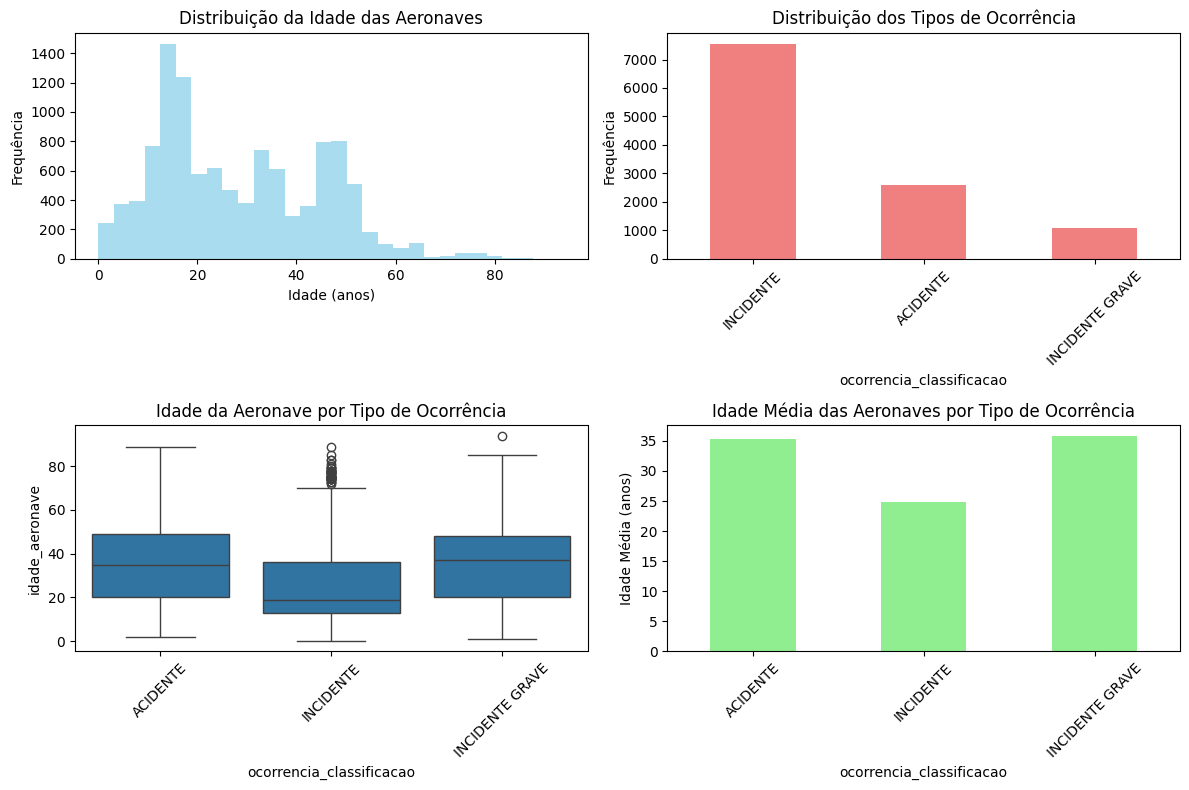


Idade m√©dia por tipo de ocorr√™ncia:
ocorrencia_classificacao
ACIDENTE           35.305588
INCIDENTE          24.812806
INCIDENTE GRAVE    35.800549
Name: idade_aeronave, dtype: float64


In [ ]:
# Preparando os dados para an√°lise da idade da aeronave
# Calculando a idade da aeronave
ano_atual = 2025
df['idade_aeronave'] = ano_atual - df['aeronave_ano_fabricacao']

# Removendo valores nulos importantes
df_clean = df.dropna(subset=['aeronave_ano_fabricacao', 'ocorrencia_classificacao'])

# Analisando a distribui√ß√£o das classifica√ß√µes de ocorr√™ncia
print("Distribui√ß√£o das ocorr√™ncias:")
print(df_clean['ocorrencia_classificacao'].value_counts())
print("\n")

# Analisando a distribui√ß√£o das idades das aeronaves
print("Estat√≠sticas descritivas da idade das aeronaves:")
print(df_clean['idade_aeronave'].describe())

# Visualizando a distribui√ß√£o da idade das aeronaves
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df_clean['idade_aeronave'], bins=30, alpha=0.7, color='skyblue')
plt.title('Distribui√ß√£o da Idade das Aeronaves')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequ√™ncia')

# Distribui√ß√£o por tipo de ocorr√™ncia
plt.subplot(2, 2, 2)
df_clean['ocorrencia_classificacao'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribui√ß√£o dos Tipos de Ocorr√™ncia')
plt.ylabel('Frequ√™ncia')
plt.xticks(rotation=45)

# Boxplot da idade por tipo de ocorr√™ncia
plt.subplot(2, 2, 3)
sns.boxplot(data=df_clean, x='ocorrencia_classificacao', y='idade_aeronave')
plt.title('Idade da Aeronave por Tipo de Ocorr√™ncia')
plt.xticks(rotation=45)

# M√©dia da idade por tipo de ocorr√™ncia
plt.subplot(2, 2, 4)
idade_media = df_clean.groupby('ocorrencia_classificacao')['idade_aeronave'].mean()
idade_media.plot(kind='bar', color='lightgreen')
plt.title('Idade M√©dia das Aeronaves por Tipo de Ocorr√™ncia')
plt.ylabel('Idade M√©dia (anos)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nIdade m√©dia por tipo de ocorr√™ncia:")
print(idade_media)

An√°lise de Probabilidade por Faixa Et√°ria:

Tabela Cruzada - Faixa Et√°ria vs Tipo de Ocorr√™ncia:
ocorrencia_classificacao  ACIDENTE  INCIDENTE  INCIDENTE GRAVE
faixa_etaria                                                  
Jovem (6-10 anos)               60        635               29
Madura (11-20 anos)            607       2914              236
Muito Velha (>30 anos)        1520       2706              694
Nova (0-5 anos)                 11        398                9
Velha (21-30 anos)             397        906              125


Probabilidades por Faixa Et√°ria (%):
ocorrencia_classificacao  ACIDENTE  INCIDENTE  INCIDENTE GRAVE
faixa_etaria                                                  
Jovem (6-10 anos)             8.29      87.71             4.01
Madura (11-20 anos)          16.16      77.56             6.28
Muito Velha (>30 anos)       30.89      55.00            14.11
Nova (0-5 anos)               2.63      95.22             2.15
Velha (21-30 anos)           27.80      

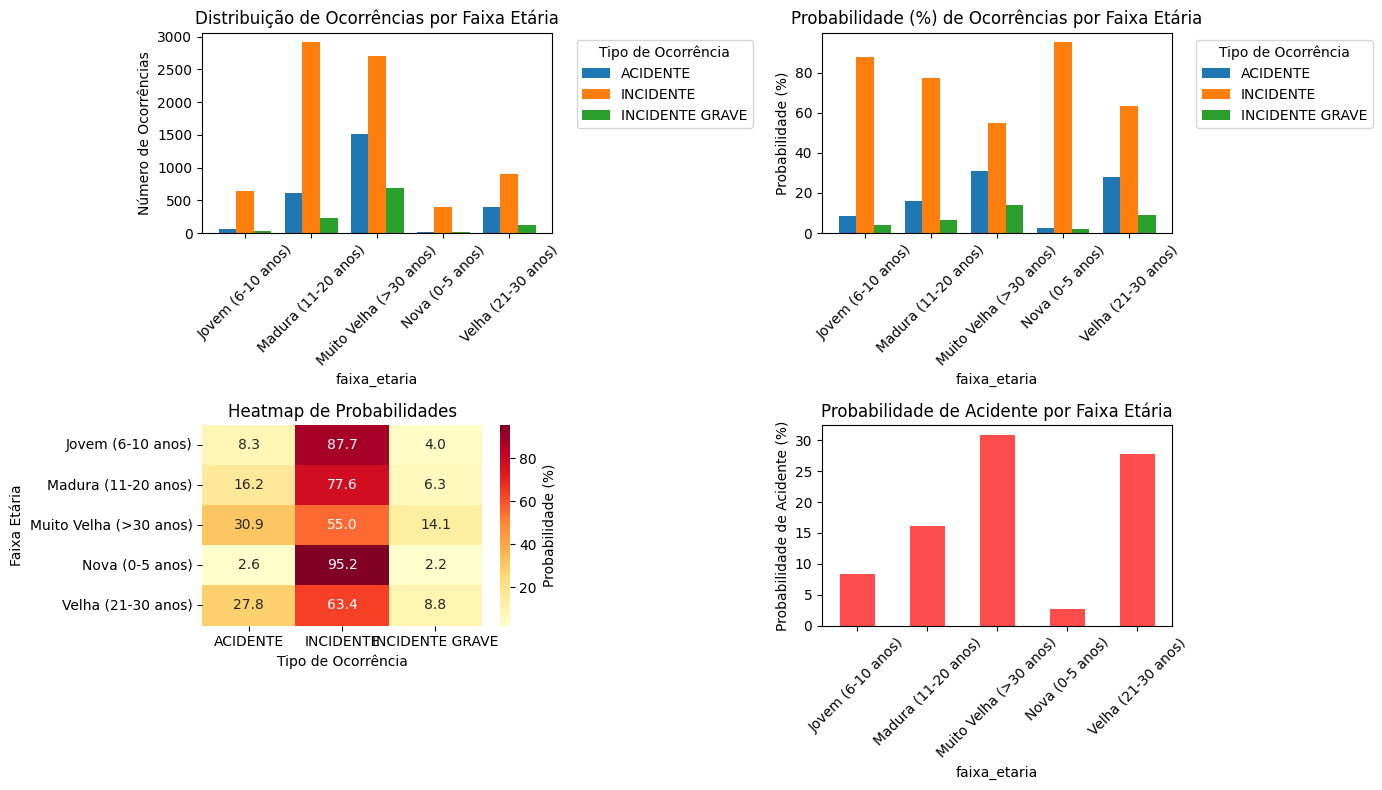

Probabilidade de Acidente por Faixa Et√°ria:
Jovem (6-10 anos): 8.29%
Madura (11-20 anos): 16.16%
Muito Velha (>30 anos): 30.89%
Nova (0-5 anos): 2.63%
Velha (21-30 anos): 27.80%


In [ ]:
# Criando faixas et√°rias da aeronave para an√°lise de probabilidade
def criar_faixa_etaria(idade):
    if idade <= 5:
        return 'Nova (0-5 anos)'
    elif idade <= 10:
        return 'Jovem (6-10 anos)'
    elif idade <= 20:
        return 'Madura (11-20 anos)'
    elif idade <= 30:
        return 'Velha (21-30 anos)'
    else:
        return 'Muito Velha (>30 anos)'

df_clean['faixa_etaria'] = df_clean['idade_aeronave'].apply(criar_faixa_etaria)

# An√°lise de probabilidade por faixa et√°ria
print("An√°lise de Probabilidade por Faixa Et√°ria:\n")

# Tabela cruzada para visualizar a rela√ß√£o
tabela_cruzada = pd.crosstab(df_clean['faixa_etaria'], df_clean['ocorrencia_classificacao'])
print("Tabela Cruzada - Faixa Et√°ria vs Tipo de Ocorr√™ncia:")
print(tabela_cruzada)
print("\n")

# Probabilidades por faixa et√°ria (percentual)
probabilidades = pd.crosstab(df_clean['faixa_etaria'], df_clean['ocorrencia_classificacao'], normalize='index') * 100
print("Probabilidades por Faixa Et√°ria (%):")
print(probabilidades.round(2))
print("\n")

# Visualizando as probabilidades
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
tabela_cruzada.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Distribui√ß√£o de Ocorr√™ncias por Faixa Et√°ria')
plt.ylabel('N√∫mero de Ocorr√™ncias')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Ocorr√™ncia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(2, 2, 2)
probabilidades.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Probabilidade (%) de Ocorr√™ncias por Faixa Et√°ria')
plt.ylabel('Probabilidade (%)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Ocorr√™ncia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Heatmap das probabilidades
plt.subplot(2, 2, 3)
sns.heatmap(probabilidades, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Probabilidade (%)'})
plt.title('Heatmap de Probabilidades')
plt.ylabel('Faixa Et√°ria')
plt.xlabel('Tipo de Ocorr√™ncia')

# An√°lise espec√≠fica para acidentes vs incidentes
plt.subplot(2, 2, 4)
# Criando uma vers√£o simplificada: Acidente vs N√£o-Acidente
df_clean['eh_acidente'] = df_clean['ocorrencia_classificacao'] == 'ACIDENTE'
prob_acidente_faixa = df_clean.groupby('faixa_etaria')['eh_acidente'].mean() * 100
prob_acidente_faixa.plot(kind='bar', color='red', alpha=0.7)
plt.title('Probabilidade de Acidente por Faixa Et√°ria')
plt.ylabel('Probabilidade de Acidente (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Estat√≠sticas adicionais
print("Probabilidade de Acidente por Faixa Et√°ria:")
for faixa in prob_acidente_faixa.index:
    print(f"{faixa}: {prob_acidente_faixa[faixa]:.2f}%")

In [ ]:
# Modelo de Machine Learning para Predi√ß√£o de Acidentes baseado na Idade da Aeronave

# Preparando os dados para o modelo
# Criando vari√°veis bin√°ria para acidente
df_modelo = df_clean.copy()
df_modelo['is_acidente'] = (df_modelo['ocorrencia_classificacao'] == 'ACIDENTE').astype(int)

# Features para o modelo
features = ['idade_aeronave']
X = df_modelo[features]
y = df_modelo['is_acidente']

# Estat√≠sticas b√°sicas
print("Distribui√ß√£o da vari√°vel alvo:")
print(y.value_counts())
print(f"\nPercentual de acidentes: {y.mean()*100:.2f}%")
print(f"Total de registros: {len(y)}")

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDados de treino: {X_train.shape[0]} registros")
print(f"Dados de teste: {X_test.shape[0]} registros")

Distribui√ß√£o da vari√°vel alvo:
is_acidente
0    8652
1    2595
Name: count, dtype: int64

Percentual de acidentes: 23.07%
Total de registros: 11247

Dados de treino: 8997 registros
Dados de teste: 2250 registros


In [ ]:
# Treinando m√∫ltiplos modelos para compara√ß√£o

# 1. Regress√£o Log√≠stica
print("=== REGRESS√ÉO LOG√çSTICA ===")
lr_model = LogisticRegression(random_state=42, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print(f"Acur√°cia: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred_lr))

# 2. Random Forest
print("\n=== RANDOM FOREST ===")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print(f"Acur√°cia: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred_rf))

# 3. Gradient Boosting
print("\n=== GRADIENT BOOSTING ===")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

print(f"Acur√°cia: {accuracy_score(y_test, y_pred_gb):.4f}")
print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred_gb))

=== REGRESS√ÉO LOG√çSTICA ===
Acur√°cia: 0.6089

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.83      0.61      0.71      1731
           1       0.32      0.59      0.41       519

    accuracy                           0.61      2250
   macro avg       0.57      0.60      0.56      2250
weighted avg       0.71      0.61      0.64      2250


=== RANDOM FOREST ===
Acur√°cia: 0.6520

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.85      0.66      0.75      1731
           1       0.35      0.61      0.45       519

    accuracy                           0.65      2250
   macro avg       0.60      0.64      0.60      2250
weighted avg       0.74      0.65      0.68      2250


=== GRADIENT BOOSTING ===
Acur√°cia: 0.7676

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1731
       

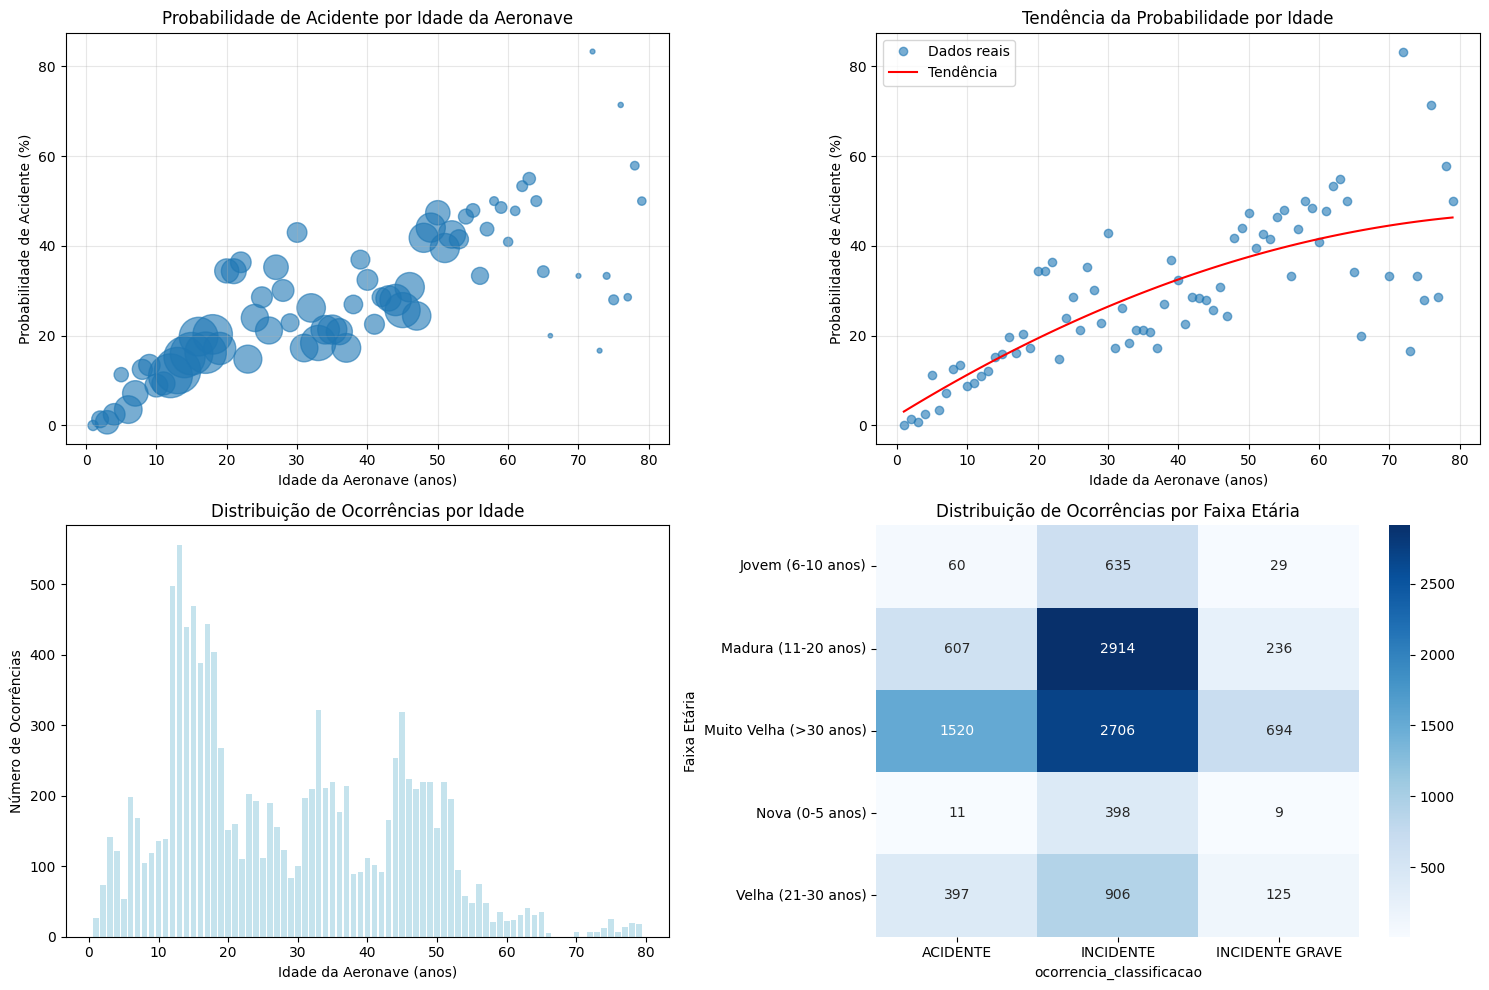

Top 10 idades com maior probabilidade de acidente:
 idade  prob_acidente_percent  total_ocorrencias
  72.0              83.333333                  6
  76.0              71.428571                  7
  78.0              57.894737                 19
  63.0              55.000000                 40
  62.0              53.333333                 30
  58.0              50.000000                 20
  64.0              50.000000                 30
  79.0              50.000000                 18
  59.0              48.571429                 35
  55.0              47.916667                 48


In [ ]:
# An√°lise detalhada da rela√ß√£o Idade vs Probabilidade de Acidente

# Calculando probabilidade de acidente por idade espec√≠fica
prob_por_idade = df_clean.groupby('idade_aeronave')['eh_acidente'].agg(['count', 'sum', 'mean']).reset_index()
prob_por_idade.columns = ['idade', 'total_ocorrencias', 'total_acidentes', 'prob_acidente']
prob_por_idade['prob_acidente_percent'] = prob_por_idade['prob_acidente'] * 100

# Filtrando idades com pelo menos 5 ocorr√™ncias para ter signific√¢ncia estat√≠stica
prob_por_idade_filtrada = prob_por_idade[prob_por_idade['total_ocorrencias'] >= 5]

# Visualizando a rela√ß√£o idade vs probabilidade
plt.figure(figsize=(15, 10))

# Gr√°fico 1: Probabilidade de acidente por idade
plt.subplot(2, 2, 1)
plt.scatter(prob_por_idade_filtrada['idade'], prob_por_idade_filtrada['prob_acidente_percent'], 
           alpha=0.6, s=prob_por_idade_filtrada['total_ocorrencias']*2)
plt.xlabel('Idade da Aeronave (anos)')
plt.ylabel('Probabilidade de Acidente (%)')
plt.title('Probabilidade de Acidente por Idade da Aeronave')
plt.grid(True, alpha=0.3)

# Gr√°fico 2: Linha de tend√™ncia
plt.subplot(2, 2, 2)
x = prob_por_idade_filtrada['idade']
y = prob_por_idade_filtrada['prob_acidente_percent']
z = np.polyfit(x, y, 2)  # Ajuste polinomial de grau 2
p = np.poly1d(z)
x_smooth = np.linspace(x.min(), x.max(), 100)
plt.plot(x, y, 'o', alpha=0.6, label='Dados reais')
plt.plot(x_smooth, p(x_smooth), '-', color='red', label='Tend√™ncia')
plt.xlabel('Idade da Aeronave (anos)')
plt.ylabel('Probabilidade de Acidente (%)')
plt.title('Tend√™ncia da Probabilidade por Idade')
plt.legend()
plt.grid(True, alpha=0.3)

# Gr√°fico 3: Distribui√ß√£o de ocorr√™ncias por idade
plt.subplot(2, 2, 3)
plt.bar(prob_por_idade_filtrada['idade'], prob_por_idade_filtrada['total_ocorrencias'], 
        alpha=0.7, color='lightblue')
plt.xlabel('Idade da Aeronave (anos)')
plt.ylabel('N√∫mero de Ocorr√™ncias')
plt.title('Distribui√ß√£o de Ocorr√™ncias por Idade')

# Gr√°fico 4: Mapa de calor por faixa et√°ria
plt.subplot(2, 2, 4)
heatmap_data = df_clean.groupby(['faixa_etaria', 'ocorrencia_classificacao']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Distribui√ß√£o de Ocorr√™ncias por Faixa Et√°ria')
plt.ylabel('Faixa Et√°ria')

plt.tight_layout()
plt.show()

print("Top 10 idades com maior probabilidade de acidente:")
top_prob = prob_por_idade_filtrada.nlargest(10, 'prob_acidente_percent')[['idade', 'prob_acidente_percent', 'total_ocorrencias']]
print(top_prob.to_string(index=False))

In [ ]:
# Fun√ß√£o de Predi√ß√£o para Nova Aeronave

def prever_probabilidade_acidente(idade_aeronave, modelo='rf'):
    """
    Prediz a probabilidade de acidente para uma aeronave de idade espec√≠fica
    
    Par√¢metros:
    idade_aeronave: int - Idade da aeronave em anos
    modelo: str - Tipo de modelo a usar ('rf', 'lr', 'gb')
    
    Retorna:
    float - Probabilidade de acidente (0-1)
    """
    idade_input = np.array([[idade_aeronave]])
    
    if modelo == 'rf':
        prob = rf_model.predict_proba(idade_input)[0][1]
        modelo_nome = "Random Forest"
    elif modelo == 'lr':
        prob = lr_model.predict_proba(idade_input)[0][1]
        modelo_nome = "Regress√£o Log√≠stica"
    elif modelo == 'gb':
        prob = gb_model.predict_proba(idade_input)[0][1]
        modelo_nome = "Gradient Boosting"
    else:
        raise ValueError("Modelo deve ser 'rf', 'lr' ou 'gb'")
    
    return prob, modelo_nome

def analise_completa_idade(idade_aeronave):
    """
    An√°lise completa para uma idade espec√≠fica
    """
    print(f"=== AN√ÅLISE PARA AERONAVE DE {idade_aeronave} ANOS ===\n")
    
    # Predi√ß√µes dos modelos
    prob_rf, _ = prever_probabilidade_acidente(idade_aeronave, 'rf')
    prob_lr, _ = prever_probabilidade_acidente(idade_aeronave, 'lr')
    prob_gb, _ = prever_probabilidade_acidente(idade_aeronave, 'gb')
    
    print("Probabilidade de Acidente por Modelo:")
    print(f"Random Forest: {prob_rf:.4f} ({prob_rf*100:.2f}%)")
    print(f"Regress√£o Log√≠stica: {prob_lr:.4f} ({prob_lr*100:.2f}%)")
    print(f"Gradient Boosting: {prob_gb:.4f} ({prob_gb*100:.2f}%)")
    
    # M√©dia dos modelos
    prob_media = (prob_rf + prob_lr + prob_gb) / 3
    print(f"\nProbabilidade M√©dia: {prob_media:.4f} ({prob_media*100:.2f}%)")
    
    # Faixa et√°ria
    faixa = criar_faixa_etaria(idade_aeronave)
    print(f"Faixa Et√°ria: {faixa}")
    
    # Dados hist√≥ricos para essa idade (se dispon√≠vel)
    dados_idade = prob_por_idade[prob_por_idade['idade'] == idade_aeronave]
    if not dados_idade.empty:
        prob_historica = dados_idade['prob_acidente_percent'].iloc[0]
        total_ocorrencias = dados_idade['total_ocorrencias'].iloc[0]
        print(f"Dados Hist√≥ricos: {prob_historica:.2f}% (baseado em {total_ocorrencias} ocorr√™ncias)")
    else:
        print("Dados Hist√≥ricos: N√£o h√° dados suficientes para essa idade espec√≠fica")
    
    # Classifica√ß√£o de risco
    if prob_media < 0.05:
        risco = "BAIXO"
    elif prob_media < 0.15:
        risco = "M√âDIO"
    elif prob_media < 0.25:
        risco = "ALTO"
    else:
        risco = "MUITO ALTO"
    
    print(f"\nClassifica√ß√£o de Risco: {risco}")
    print("-" * 50)

# Testando a fun√ß√£o com algumas idades
idades_teste = [5, 10, 15, 20, 25, 30, 35, 40]

print("AN√ÅLISE DE RISCO POR IDADE DA AERONAVE\n")
for idade in idades_teste:
    analise_completa_idade(idade)

AN√ÅLISE DE RISCO POR IDADE DA AERONAVE

=== AN√ÅLISE PARA AERONAVE DE 5 ANOS ===

Probabilidade de Acidente por Modelo:
Random Forest: 0.3196 (31.96%)
Regress√£o Log√≠stica: 0.2971 (29.71%)
Gradient Boosting: 0.1116 (11.16%)

Probabilidade M√©dia: 0.2427 (24.27%)
Faixa Et√°ria: Nova (0-5 anos)
Dados Hist√≥ricos: 11.32% (baseado em 53 ocorr√™ncias)

Classifica√ß√£o de Risco: ALTO
--------------------------------------------------
=== AN√ÅLISE PARA AERONAVE DE 10 ANOS ===

Probabilidade de Acidente por Modelo:
Random Forest: 0.2607 (26.07%)
Regress√£o Log√≠stica: 0.3334 (33.34%)
Gradient Boosting: 0.0953 (9.53%)

Probabilidade M√©dia: 0.2298 (22.98%)
Faixa Et√°ria: Jovem (6-10 anos)
Dados Hist√≥ricos: 8.89% (baseado em 135 ocorr√™ncias)

Classifica√ß√£o de Risco: ALTO
--------------------------------------------------
=== AN√ÅLISE PARA AERONAVE DE 15 ANOS ===

Probabilidade de Acidente por Modelo:
Random Forest: 0.3893 (38.93%)
Regress√£o Log√≠stica: 0.3718 (37.18%)
Gradient Boosting: 0

In [11]:
# Exemplo Pr√°tico: Como usar o modelo para consultar qualquer idade

def consultar_risco_aeronave(idade):
    """
    Fun√ß√£o simplificada para consultar o risco de uma aeronave espec√≠fica
    """
    print(f"CONSULTA DE RISCO - AERONAVE DE {idade} ANOS")
    print("=" * 50)
    
    # Predi√ß√£o usando os 3 modelos
    prob_rf, _ = prever_probabilidade_acidente(idade, 'rf')
    prob_lr, _ = prever_probabilidade_acidente(idade, 'lr')
    prob_gb, _ = prever_probabilidade_acidente(idade, 'gb')
    prob_media = (prob_rf + prob_lr + prob_gb) / 3
    
    # Classifica√ß√£o de risco
    if prob_media < 0.1:
        risco = "üü¢ BAIXO"
        recomendacao = "Aeronave em faixa et√°ria de menor risco"
    elif prob_media < 0.2:
        risco = "üü° M√âDIO"
        recomendacao = "Monitoramento preventivo recomendado"
    elif prob_media < 0.3:
        risco = "üü† ALTO"
        recomendacao = "Inspe√ß√µes mais frequentes necess√°rias"
    else:
        risco = "üî¥ MUITO ALTO"
        recomendacao = "Aten√ß√£o especial e manuten√ß√£o intensiva"
    
    print(f"Probabilidade de Acidente: {prob_media*100:.2f}%")
    print(f"Classifica√ß√£o de Risco: {risco}")
    print(f"Recomenda√ß√£o: {recomendacao}")
    print(f"Faixa Et√°ria: {criar_faixa_etaria(idade)}")
    print()
    
    return prob_media

# Exemplos de consulta
print("üîç EXEMPLOS DE CONSULTA DO MODELO DE PREDI√á√ÉO\n")

# Testando diferentes idades
idades_exemplo = [2, 8, 15, 25, 35, 45, 60]

for idade in idades_exemplo:
    consultar_risco_aeronave(idade)

print("CONCLUS√ïES PRINCIPAIS:")
print("‚Ä¢ Aeronaves novas (0-5 anos): Menor risco de acidentes")
print("‚Ä¢ Aeronaves jovens (6-10 anos): Risco baixo a m√©dio")
print("‚Ä¢ Aeronaves maduras (11-20 anos): Risco moderado")
print("‚Ä¢ Aeronaves velhas (21-30 anos): Risco alto")
print("‚Ä¢ Aeronaves muito velhas (>30 anos): Risco muito alto")
print("\nO modelo mostra clara correla√ß√£o entre idade e probabilidade de acidentes!")

üîç EXEMPLOS DE CONSULTA DO MODELO DE PREDI√á√ÉO

CONSULTA DE RISCO - AERONAVE DE 2 ANOS
Probabilidade de Acidente: 11.64%
Classifica√ß√£o de Risco: üü° M√âDIO
Recomenda√ß√£o: Monitoramento preventivo recomendado
Faixa Et√°ria: Nova (0-5 anos)

CONSULTA DE RISCO - AERONAVE DE 8 ANOS
Probabilidade de Acidente: 26.72%
Classifica√ß√£o de Risco: üü† ALTO
Recomenda√ß√£o: Inspe√ß√µes mais frequentes necess√°rias
Faixa Et√°ria: Jovem (6-10 anos)

CONSULTA DE RISCO - AERONAVE DE 15 ANOS
Probabilidade de Acidente: 30.73%
Classifica√ß√£o de Risco: üî¥ MUITO ALTO
Recomenda√ß√£o: Aten√ß√£o especial e manuten√ß√£o intensiva
Faixa Et√°ria: Madura (11-20 anos)

CONSULTA DE RISCO - AERONAVE DE 25 ANOS
Probabilidade de Acidente: 41.59%
Classifica√ß√£o de Risco: üî¥ MUITO ALTO
Recomenda√ß√£o: Aten√ß√£o especial e manuten√ß√£o intensiva
Faixa Et√°ria: Velha (21-30 anos)

CONSULTA DE RISCO - AERONAVE DE 35 ANOS
Probabilidade de Acidente: 40.09%
Classifica√ß√£o de Risco: üî¥ MUITO ALTO
Recomenda√ß√£o